In [3]:
import numpy as np
import matplotlib as plt

from qiskit.providers.ibmq import least_busy
from qiskit import *

In [47]:
n=6
secret_key='110110'

In [48]:
qc=QuantumCircuit(n+1,n)
for i in range(n):
    qc.h(i)
qc.x(n)
qc.h(n)
qc.barrier()

#this will be our oracle
for ii, yesno in enumerate(reversed(secret_key)):
    if yesno == '1':
        qc.cx(ii,len(secret_key))
# qc.cx(5,6)
# qc.cx(2,6)
qc.barrier()
for i in range(n):
    qc.h(i)
#qc.measure([0,1,2,3,4,5],[0,1,2,3,4,5])
qc.measure(range(len(secret_key)),range(len(secret_key)))


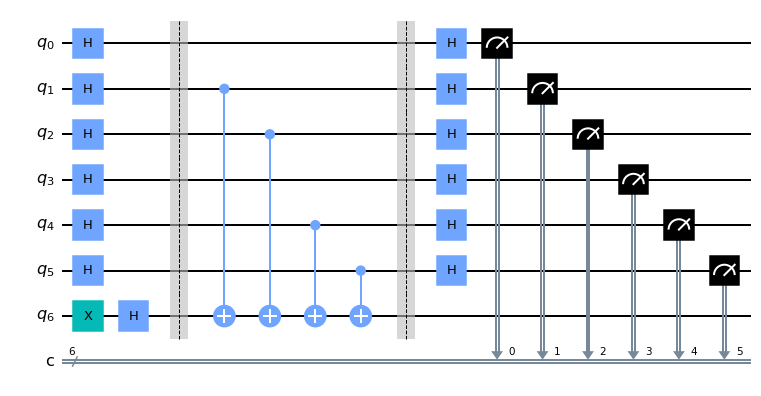

In [49]:
qc.draw(output="mpl")

In [50]:
sim = Aer.get_backend('qasm_simulator')
result=execute(qc, backend= sim, shots=1).result()
counts=result.get_counts()
print(counts)

{'110110': 1}
